# Introduction - Image Classification

## Load modules

In [21]:
import torch
from torchvision import transforms
from torchvision import models

import urllib.request
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
torch.__version__

'2.6.0'

In [3]:
torch.cuda.is_available()

False

## Download Image

In [5]:
url = "https://pytorch.tips/coffee"
fpath = "coffee.jpg"
urllib.request.urlretrieve(url, fpath)

('coffee.jpg', <http.client.HTTPMessage at 0x11a977910>)

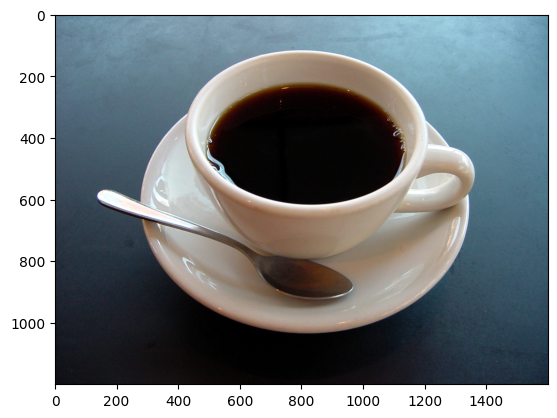

In [7]:
image = Image.open(fpath)
plt.imshow(image)

## Preprocess Image

In [9]:
tranform = transforms.Compose([
    transforms.Resize(256), # shorter side resized to 256
    transforms.CenterCrop(224), # get center 224x224 crop
    transforms.ToTensor(), # convert to tensor
    transforms.Normalize( # normalize to ImageNet means and stds
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

In [10]:
img_tensor = tranform(image)

In [12]:
type(img_tensor)

torch.Tensor

In [ ]:
# 3-channel image, 224x224
img_tensor.shape

torch.Size([3, 224, 224])

In [ ]:
# efficient ML processes data in batches
# since we only have one image, we create a batch of size 1
batch = img_tensor.unsqueeze(0) # add a new dimension at dim 0

In [20]:
batch.shape

torch.Size([1, 3, 224, 224])

## Load Model

In [ ]:
# downloads model to ~/.cache/torch/hub/checkpoints
# - pretrained weights on ImageNet
model = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

In [26]:
model.eval() # set to eval mode (inference instead of training)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
model.to(device) # sends model to GPU if available

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Inference on Model
- output `y` consist of a batch of 1000 outputs
- since batch only contains 1 image, first dimension is 1 
    - while number of classes is 1000 (one for each class)
        - the higher the value the more likely image is that class

In [ ]:
y = model(batch.to(device)) # send batch to GPU if available

In [ ]:

y.shape

torch.Size([1, 1000])

In [35]:
ymax, index = torch.max(y, 1)
print(f'ymax:{ymax}, index: {index}')

ymax:tensor([22.8618], grad_fn=<MaxBackward0>), index: tensor([967])


to determine what class 967 represent

In [36]:
url = 'https://pytorch.tips/imagenet-labels'
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

('imagenet_class_labels.txt', <http.client.HTTPMessage at 0x12c2abe90>)

In [37]:
with open('imagenet_class_labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [38]:
labels[index]

"967: 'espresso',"

In [39]:
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100

In [42]:
index

tensor([967])

In [43]:
index[0]

tensor(967)

In [40]:
print(f'Class: {labels[index[0]]}, Probability: {prob[index[0]].item():.2f}%')

Class: 967: 'espresso',, Probability: 88.00%


In [ ]:
# Print top 5 predictions
_,indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
    print(f'{labels[idx]}: {prob[idx].item():.2f}%')

967: 'espresso',: 88.00%
968: 'cup',: 7.69%
504: 'coffee mug',: 3.86%
925: 'consomme',: 0.35%
960: 'chocolate sauce, chocolate syrup',: 0.05%


# Summary 
- Code to classify
```
import torch
from torchvision import transforms, models

transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_tensor = transform(img)
batch = img_tensor.unsqueeze(0)
model = models.alexnet(pretrained=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.eval()
model.to(device)
y = model(batch.to(device))

prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
  print(classes[idx], prob[idx].item())
```